# Projeto 2 - Ciência dos Dados

***

Giancarlo Vanoni Ruggiero 

Maria Eduarda Gonçalves Torres

Rodrigo Vilela

*** 

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [6]:
data = 'heart.xlsx'
dados = pd.read_excel( data)
dados.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Legenda

* **idade -** idade em anos

* **sexo -** sexo ( 1 = masculino; 0 = feminino )

* **cp -** tipo de dor torácica ( 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática )

* **trtbps -** pressão arterial em repouso ( em mm Hg na admissão ao hospital )

* **col -**  colesterol sérico em mg / dl

* **fbs -**  açúcar no sangue em jejum> 120 mg / dl ( 1 = verdadeiro; 0 = falso )

* **restecg -**  resultados eletrocardiográficos em repouso ( 1 = normal; 2 = tendo anormalidade da onda ST-T; 0 = hipertrofia )

* **thalach -**  frequência cardíaca máxima alcançada

* **exang -**  angina induzida por exercício ( 1 = sim; 0 = não )

* **oldpeak -**  depressão de ST induzida por exercícios em relação ao repouso

* **slope -**  a inclinação do segmento ST de pico do exercício ( 2 = inclinação para cima; 1 = plana; 0 = inclinação para baixo )

* **caa -**  número de vasos principais ( 0-3 ) coloridos por fluorosopia

* **thal -**  Resultado do teste de estresse do Thalium  ~ (0,3)

* **output ( target ) -**  o atributo previsto - chance de doença cardíaca ( Valor 0 = menor chance; Valor 1 => maior chance)

### Objetivo

O objetivo do projeto é explicar / prever se as chances de um paciente ter ataque cardíaco é alta ou baixa, em função de indicadores de doenças cardíacas, que são:

- **Qualitativas**

   - sexo
   - cp
   - fbs
   - restecg
   - exng
   - slope
   - thal


- **Quantitativas**

    - idade 
    - trstbps
    - col
    - thalach
    - oldpeak
    - caa


Os recursos são calculados a partir de análises estatísticas que consistiram na distribuição das variáveis antropométricas segundo os fatores de risco cardiovascular por medidas de frequência e dispersão. Por conta disso, será considerarado a coluna output como variável dependente (variável target). E as outras colunas como variávies independentes (variáveis features).

---

O comando `df.isnull().sum() ` certifica que todas as colunas estão com dados preenchidos. Sendo assim, podendo então prosseguir com a análise.

In [7]:
dados.isnull().sum()  

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

O `sns.heatmap()` abaixo vai representa a colinearidade de todas variáveis no conjunto de dados.

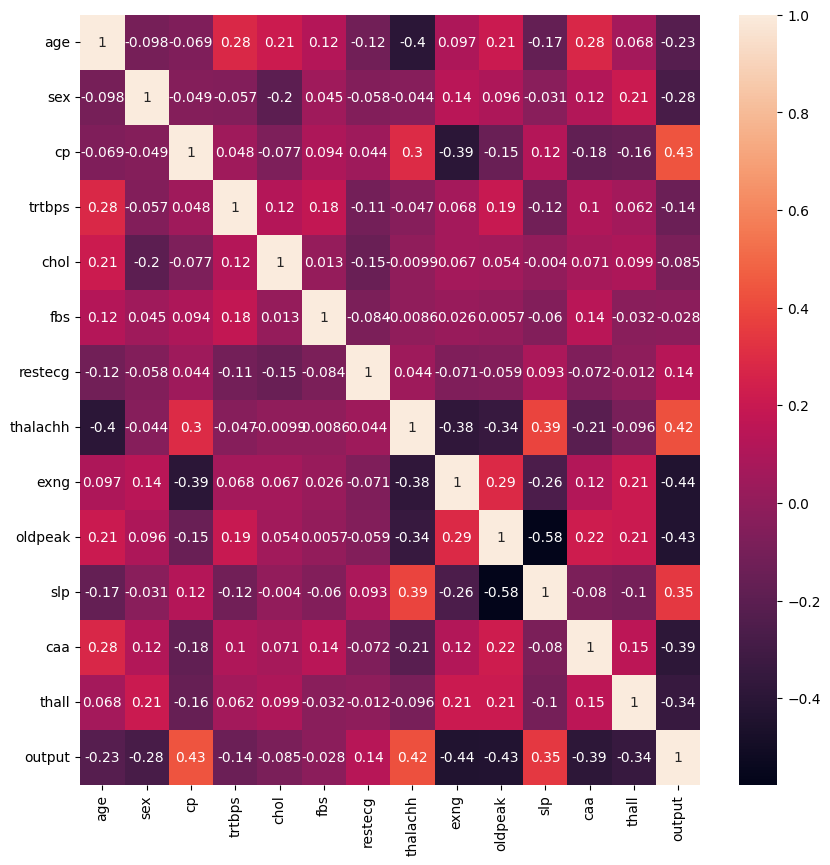

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(dados.corr(), annot=True); #annot mostra os coeficientes da matriz
plt.show();

Cada quadrado mostra a correlação entre as variáveis em cada eixo. A correlação varia de -1 a +1. Valores mais próximos de zero significam que não há tendência linear entre as duas variáveis. 

Quanto mais próxima de 1 a correlação é, mais positivamente correlacionados eles são; isto é, à medida que um aumenta, o outro aumenta e quanto mais próximo de 1, mais forte é a relação, de modo à perceber a alta e positiva associação entre a target `output` e as features `slp`,`thalachh` e `cp`. 


Uma correlação mais próxima de -1 é semelhante, mas em vez de aumentar, uma variável diminuirá à medida que a outra aumenta. Portanto conforme explorado, pode-se observar uma forte e negativa dependência entre a target `output` e as features `exng  `,`oldpeak ` e ` caa `. 

Concluindo então que as features `slp`,`thalachh` , `cp`, `exng  `,`oldpeak ` e ` caa ` serão as mais relevantes para chegar na variável independente, pois são as que possuem maior correlação com a target.

# **Análise Exploratória**

A seguir será feito uma análise descritiva das variáveis, conforme o objetivo do projeto. Assim será entendido como a variável target ( output ) se comporta cruzada com cada feature. Contudo cada cruzamento irá exigir ferramentas descritivas distintas.

### Análise descritiva  de variáveis <u> quantitativa VS qualitativas( target )</u>

In [9]:
maior_chance=dados.loc[dados['output']==1,:]
menor_chance=dados.loc[dados['output']==0,:]
labels=['Mais Chance = 1', 'Menos Chance = 0']

#### Idade

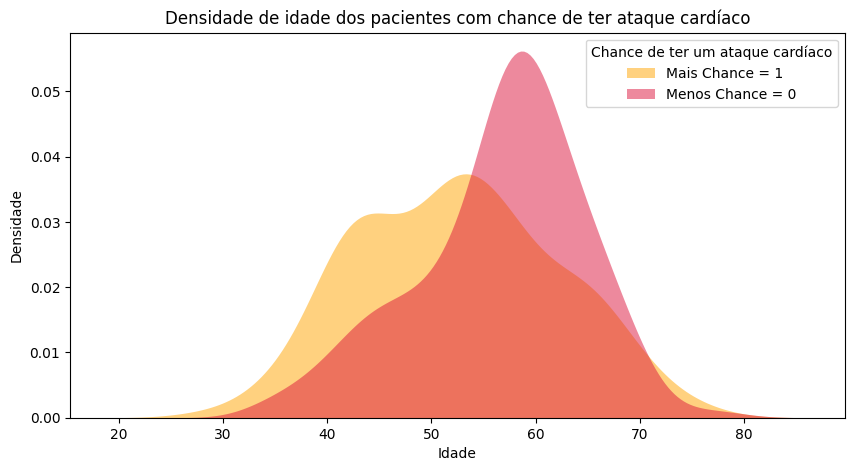

In [10]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="age", hue="output",
   fill=True, common_norm=False, palette=['#DC143C','#FFA500'],
   alpha=.5, linewidth=0)
plt.title('Densidade de idade dos pacientes com chance de ter ataque cardíaco')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [11]:
dados.groupby('output').age.describe()  

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Como é possivel analisar no gráfico e na tabela acima, pessoas entre 20 a 50 anos anos tendem a ter uma maior chance de ter ataque cardíaco. Enquanto pessoas de 50 a 70 anos possuem uma menor chance. 

-----------------

#### Pressão arterial

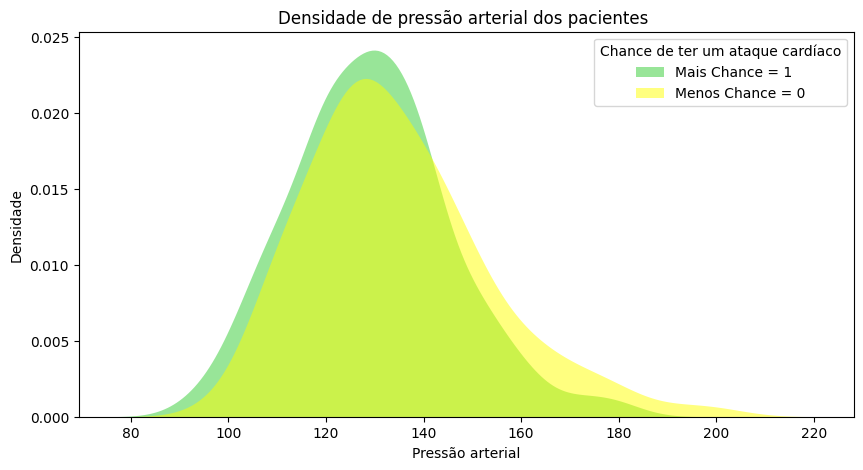

In [12]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="trtbps", hue="output",
   fill=True, common_norm=False, palette=['#FFFF00','#32CD32'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de pressão arterial dos pacientes ')
plt.ylabel('Densidade')
plt.xlabel('Pressão arterial')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [13]:
dados.groupby('output').trtbps.describe() 

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,165.0,129.303030,16.169613,94.0,120.0,130.0,140.00,180.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Quando a pressão arterial comeca a ser maior que 144.75 as chances de ter um ataque começa a diminuir, entretanto nos 25% e 50% do gráfico a pressão se torna irrelevante para assumir qual maior ou menor chance de ter um ataque, ja que as probabilidades são iguais.

-----------------

#### Colesterol

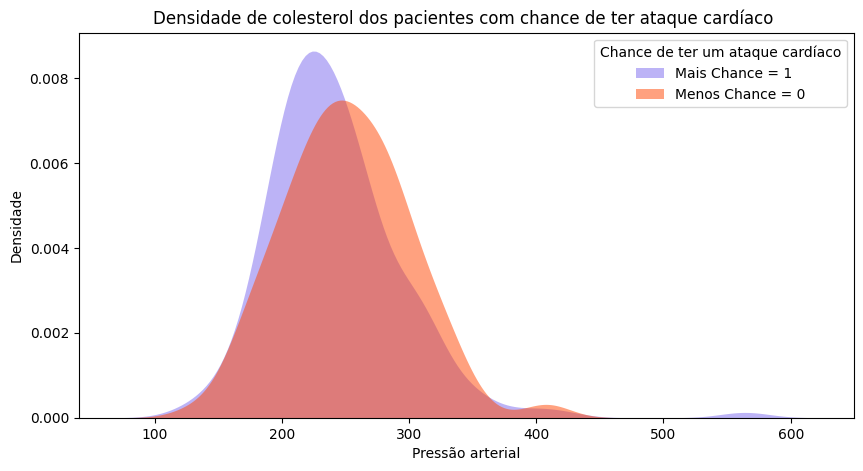

In [14]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="chol", hue="output",
   fill=True, common_norm=False, palette=['#FF4500','#7B68EE'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de colesterol dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Pressão arterial')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [15]:
dados.groupby('output').chol.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.0,409.0
1,165.0,242.230303,53.552872,126.0,208.00,234.0,267.0,564.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Quando o colesterol está entre 217.25 e 283, ou seja, entre 25% e 75% do gráfico, as chances de ter um ataque são menores, contudo a partir de 283 para cima as chances começam a aumentar. 

-----------------

#### Frequência cardíaca máxima alcançada

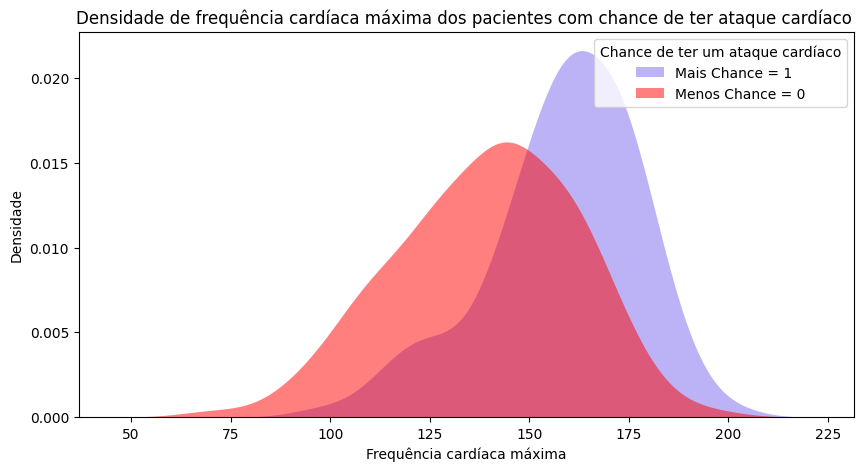

In [16]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="thalachh", hue="output",
   fill=True, common_norm=False, palette=['#FF0000','#7B68EE'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de frequência cardíaca máxima dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Frequência cardíaca máxima')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [17]:
dados.groupby('output').thalachh.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,139.101449,22.598782,71.0,125.0,142.0,156.0,195.0
1,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Frequências cardiacas entre 71 e 140 tendem a dar uma chance menor de uma pessoa ter ataque cardiaco, a partir de mais ou menos 150 para cima, as chanches de ter um ataque começam a aumentar cada vez mais.

--------

#### Número de vasos principais

In [18]:
dados['caa'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: caa, dtype: float64

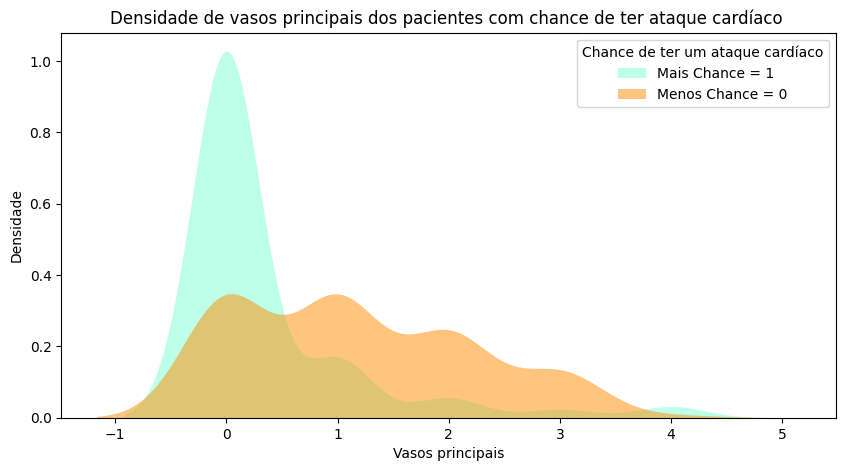

In [19]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="caa", hue="output",
   fill=True, common_norm=False, palette=['#FF8C00','#7FFFD4'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de vasos principais dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Vasos principais')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [20]:
dados.groupby('output').caa.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,1.166667,1.043460,0.0,0.0,1.0,2.0,4.0
1,165.0,0.363636,0.848894,0.0,0.0,0.0,0.0,4.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com um número menor de vasos principais tendem a ter mais chance de ter um ataque cardiaco, enquanto aquelas que possuem entre 1 a 3 vasos tendem a ter uma menor chance.

-----------

#### Old Peak

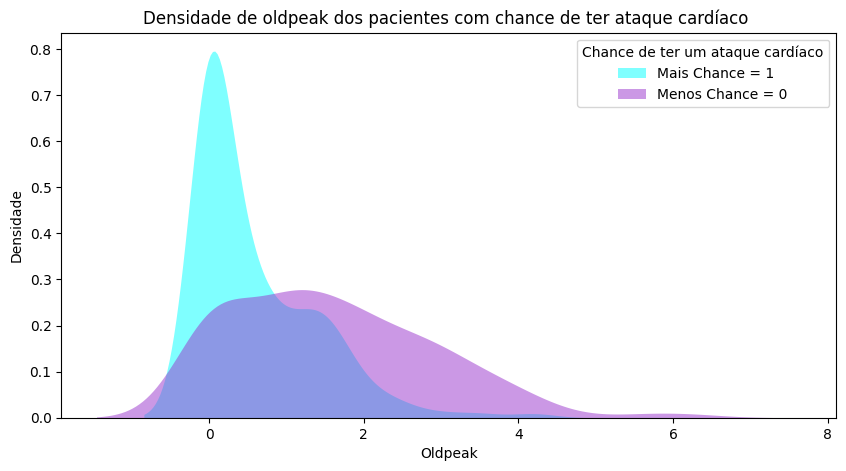

In [21]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="oldpeak", hue="output",
   fill=True, common_norm=False, palette=['#9932CC','#00FFFF'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de oldpeak dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Oldpeak')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [22]:
dados.groupby('output').oldpeak.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,1.585507,1.300340,0.0,0.6,1.4,2.5,6.2
1,165.0,0.583030,0.780683,0.0,0.0,0.2,1.0,4.2


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com um oldpeak entre 1.58 tendem a ter uma menor chance de ter ataque cardiaco, enquanto pessoas entre 0.58 tendem a ter as chances elevadas. 

--------------

### Análise descritiva  de variáveis <u> qualitativas VS qualitativa ( target )</u>

#### Sexo

In [23]:
pd.crosstab(dados['output'], dados['sex'],normalize=True,margins=True)

sex,0,1,All
output,,,
0,0.079208,0.376238,0.455446
1,0.237624,0.306931,0.544554
All,0.316832,0.683168,1.000000


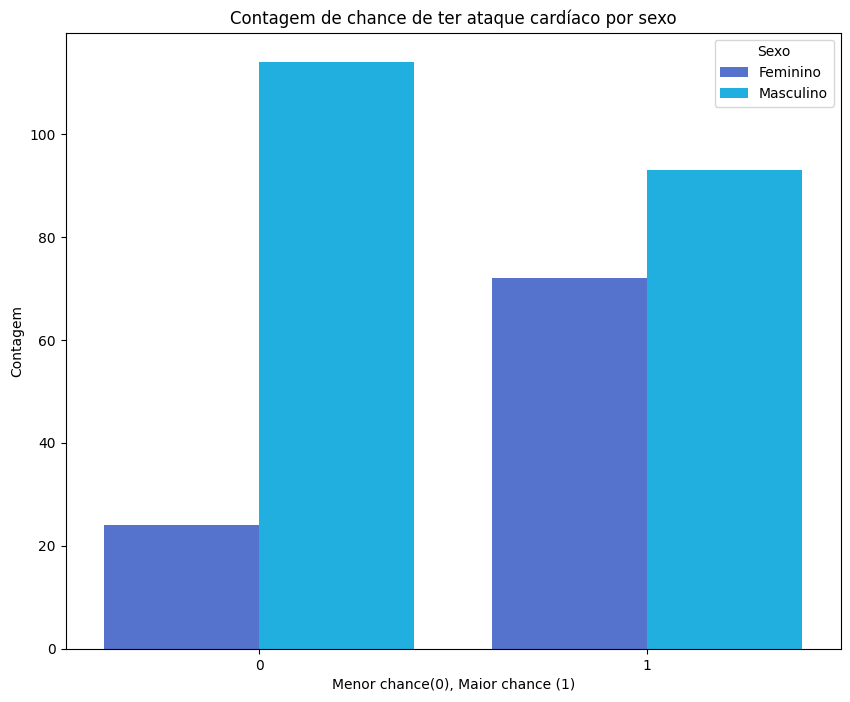

In [24]:
ct = pd.crosstab(dados['output'], dados['sex'])

stacked = ct.stack().reset_index().rename(columns={0:'value'})

labels=['Feminino', 'Masculino']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked.output, y=stacked.value, hue=stacked.sex,palette=['#4169E1','#00BFFF'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por sexo')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Sexo")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Conforme analisado no gráfico, o sexo masculino não apresenta grande correlação de qualquer tipo com a possibilidade de infarto. Contudo, com os valores numéricos pode-se concluir que mulheres possuem uma maior possibilidade de infarto. 

----

#### Tipo de dor torácica

In [25]:
pd.crosstab(dados['output'], dados['cp'],normalize=True,margins=True)

cp,0,1,2,3,All
output,,,,,
0,0.343234,0.029703,0.059406,0.023102,0.455446
1,0.128713,0.135314,0.227723,0.052805,0.544554
All,0.471947,0.165017,0.287129,0.075908,1.000000


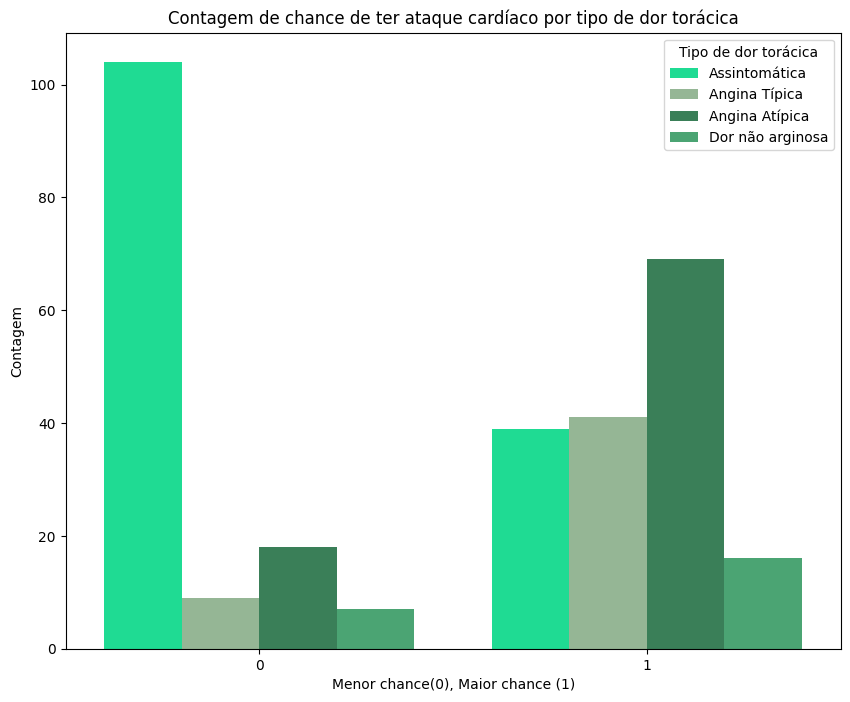

In [26]:
ct_cp = pd.crosstab(dados['output'], dados['cp'])

stacked_cp = ct_cp .stack().reset_index().rename(columns={0:'value'})

labels=['Assintomática', 'Angina Típica','Angina Atípica', 'Dor não arginosa']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_cp.output, y=stacked_cp.value, hue=stacked_cp.cp,palette=['#00FA9A','#8FBC8F','#2E8B57','#3CB371'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por tipo de dor torácica')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Tipo de dor torácica")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Existe primeiramente uma correlação entre a presença de sintomas e a maior probabilidade de infarto. Mas percebe-se também que para os pacientes com maior possibilidade de infarto possuem em geral o sintoma de Angina atípica.

----

#### Açúcar no sangue em jejum

In [27]:
pd.crosstab(dados['output'], dados['fbs'],normalize=True,margins=True)

fbs,0,1,All
output,,,
0,0.382838,0.072607,0.455446
1,0.468647,0.075908,0.544554
All,0.851485,0.148515,1.000000


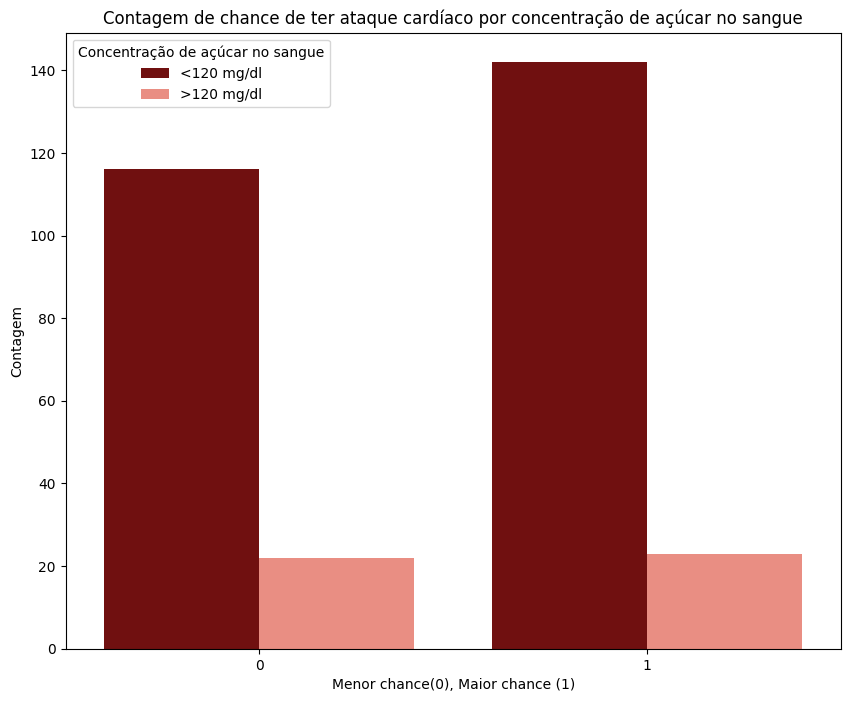

In [28]:
ct_fbs = pd.crosstab(dados['output'], dados['fbs'])

stacked_fbs = ct_fbs.stack().reset_index().rename(columns={0:'value'})

labels=['<120 mg/dl', '>120 mg/dl']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_fbs.output, y=stacked_fbs.value, hue=stacked_fbs.fbs,palette=['#800000','#FA8072'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por concentração de açúcar no sangue')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Concentração de açúcar no sangue")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

 Parece haver pouquíssima correlação entre o açúcar no sangue durante jejum e a probabilidade de infartos. Indicando que não é um parâmetro útil para a análise.

----

#### Resultados eletrocardiográficos em repouso

In [29]:
pd.crosstab(dados['output'], dados['restecg'],normalize=True,margins=True)

restecg,0,1,2,All
output,,,,
0,0.260726,0.184818,0.009901,0.455446
1,0.224422,0.316832,0.003300,0.544554
All,0.485149,0.501650,0.013201,1.000000


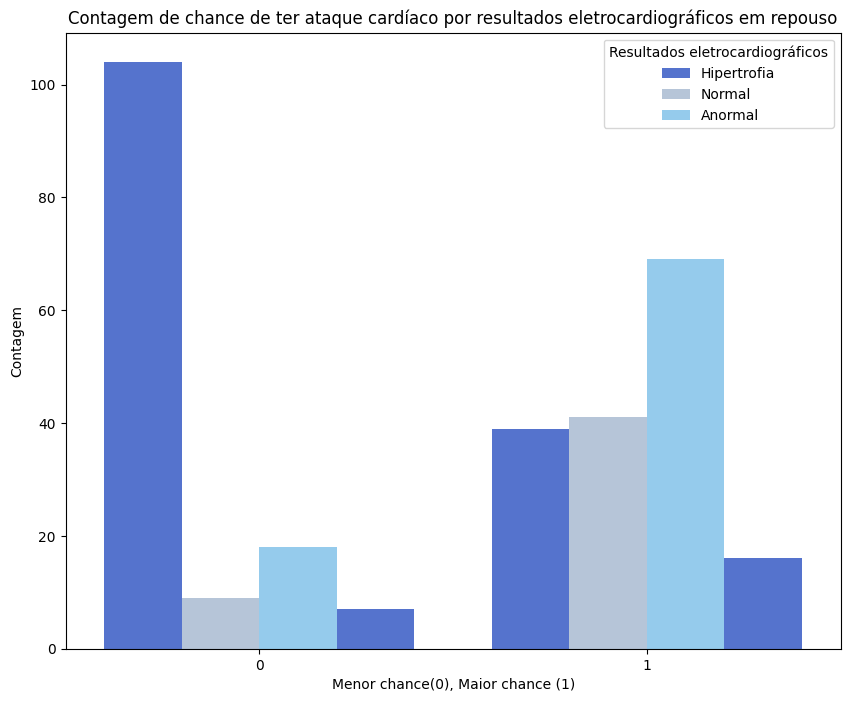

In [30]:
ct_restecg = pd.crosstab(dados['output'], dados['restecg'])

stacked_restecg = ct_restecg.stack().reset_index().rename(columns={0:'value'})

labels=['Hipertrofia', 'Normal','Anormal']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_cp.output, y=stacked_cp.value, hue=stacked_cp.cp,palette=['#4169E1','#B0C4DE','#87CEFA'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por resultados eletrocardiográficos em repouso')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Resultados eletrocardiográficos")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com resultados normais apresentam uma maior possibilidade de infarto. Já para resultados de hipertrofia e anomalia de onda existe uma correlação negativa com a probabilidade de infarto.

----

#### Angina induzida por exercício 

In [31]:
pd.crosstab(dados['output'], dados['exng'],normalize=True,margins=True)

exng,0,1,All
output,,,
0,0.204620,0.250825,0.455446
1,0.468647,0.075908,0.544554
All,0.673267,0.326733,1.000000


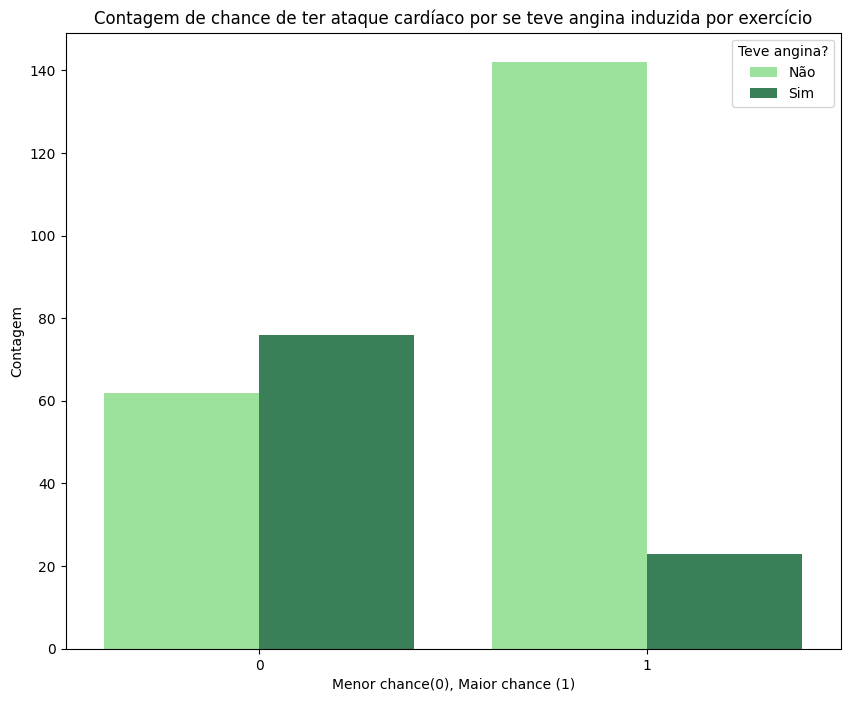

In [32]:
ct_exng = pd.crosstab(dados['output'], dados['exng'])

stacked_exng = ct_exng.stack().reset_index().rename(columns={0:'value'})

labels=['Não', 'Sim']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_exng.output, y=stacked_exng.value, hue=stacked_exng.exng,palette=['#90EE90','#2E8B57'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por se teve angina induzida por exercício')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Teve angina?")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Os dados mostram uma correlação negativa entre ter a angina induzida por exercício e a chance de infartos. 

----

#### Inclinação do segmento ST de pico do exercício

In [33]:
pd.crosstab(dados['output'], dados['slp'],normalize=True,margins=True)

slp,0,1,2,All
output,,,,
0,0.039604,0.300330,0.115512,0.455446
1,0.029703,0.161716,0.353135,0.544554
All,0.069307,0.462046,0.468647,1.000000


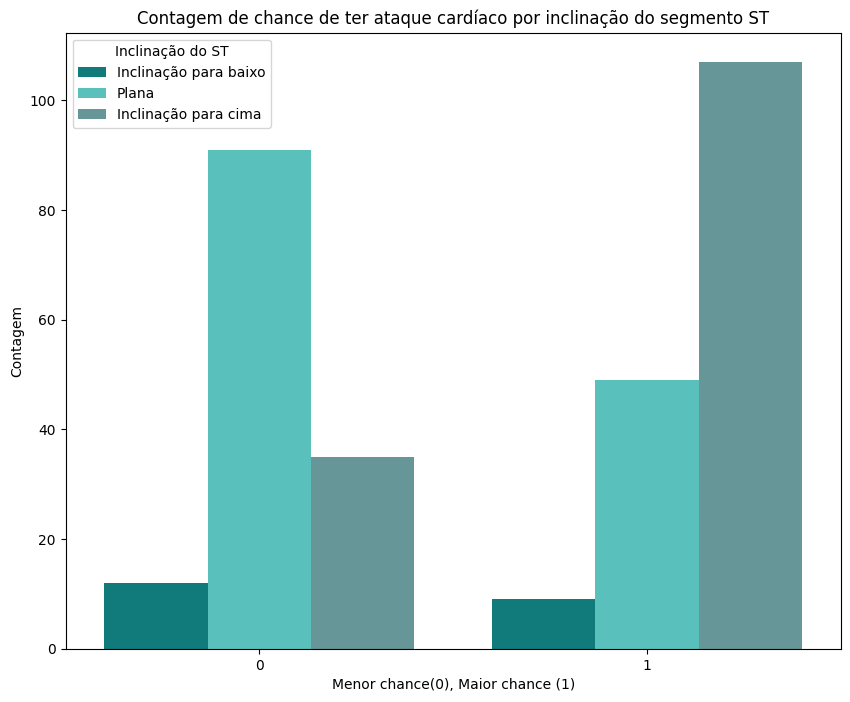

In [34]:
ct_slp = pd.crosstab(dados['output'], dados['slp'])

stacked_slp = ct_slp.stack().reset_index().rename(columns={0:'value'})

labels=['Inclinação para baixo', 'Plana', 'Inclinação para cima']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_slp.output, y=stacked_slp.value, hue=stacked_slp.slp,palette=['#008B8B','#48D1CC','#5F9EA0'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por inclinação do segmento ST')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Inclinação do ST")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

A probabilidade de infarto parece maior conforme há inclinação para cima mostrando uma correlação positiva.

----

#### Talassemia

In [35]:
pd.crosstab(dados['output'], dados['thall'],normalize=True,margins=True)

thall,0,1,2,3,All
output,,,,,
0,0.003300,0.039604,0.118812,0.293729,0.455446
1,0.003300,0.019802,0.429043,0.092409,0.544554
All,0.006601,0.059406,0.547855,0.386139,1.000000


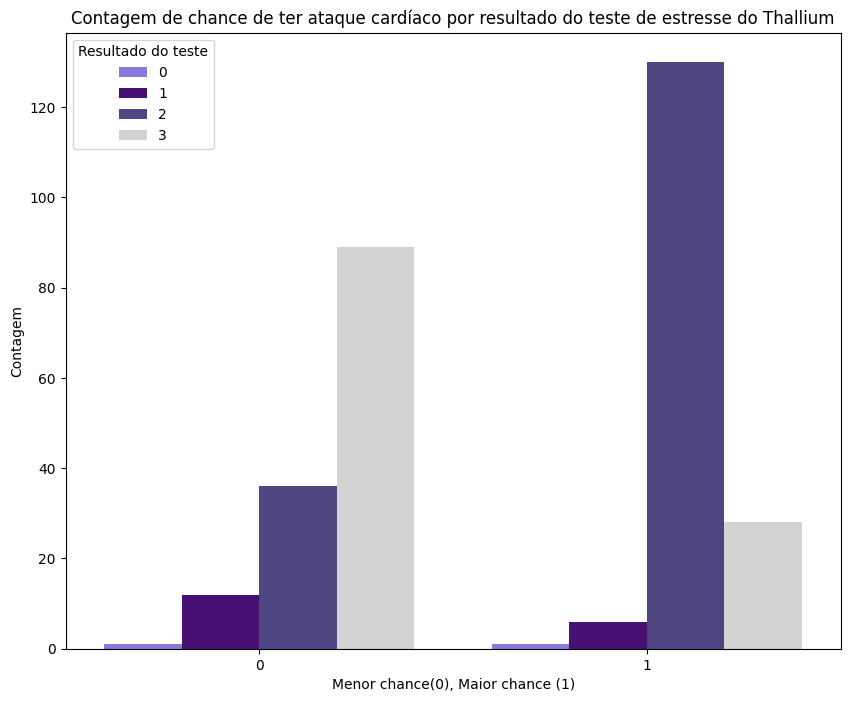

In [36]:
ct_thall = pd.crosstab(dados['output'], dados['thall'])

stacked_thall = ct_thall.stack().reset_index().rename(columns={0:'value'})

labels=['0', '1', '2','3']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=stacked_thall.output, y=stacked_thall.value, hue=stacked_thall.thall,palette=['#7B68EE','#4B0082','#483D8B','#D3D3D3'])
ax.set_ylabel("Contagem")
ax.set_xlabel('Menor chance(0), Maior chance (1)')
ax.set_title('Contagem de chance de ter ataque cardíaco por resultado do teste de estresse do Thallium')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Resultado do teste")
plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

 Pessoas que tiveram defeitos corrigidos ou mesmo irreparáveis diagnosticados possuem menos probabilidade de infarto em relação as que não tiveram nada.

------

# **Modelos de Predição**

Depois de analisar e entender melhor como as features se relacionam com a target, procede-se às possíveis técnicas que podem ser aplicadas na base de dados para se obter um bom modelo de predição. 

A seguir a base de dados será separada em base de treino e base de teste, posto que é um ponto fundamental para validar o modelo escolhido.  A base de treino é aquela que, será utilizada para treinar o modelo. Já a base de teste refere-se à amostra de dados que será utilizada para avaliar o desempenho do seu modelo no mundo real.

O `train_test_split` vai separar o dataframe em base de treinamento e de teste.

In [37]:
X = dados.drop('output',1)
Y = dados.output.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

C:\Users\gvgia\AppData\Local\Temp\ipykernel_21480\2279678879.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dados.drop('output',1)


## Support Vector Classification

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']

score=0

for i in range (len(kernels)):
    svc = SVC(kernel=kernels[i]).fit(X_train,Y_train)
    
    cv_result = cross_val_score(svc, X_train, Y_train, cv=10, scoring="accuracy")
    
    svc.fit(X_train, Y_train)
    
    y_predict=svc.predict(X_test)
    
    score_new=accuracy_score(Y_test, y_predict)

    if score_new >= score:
        score=score_new
        melhor_kernel=kernels[i]

melhor_kernel

'linear'

In [40]:
svc = SVC(kernel=melhor_kernel).fit(X_train,Y_train)

cv_result = cross_val_score(svc, X_train, Y_train, cv=10, scoring="accuracy")

svc.fit(X_train, Y_train)

y_predict=svc.predict(X_test)

print("O teste de acurácia do SVC é ", 100*accuracy_score(Y_test, y_predict))

O teste de acurácia do SVC é  83.0


#### Matriz de confusão

In [41]:
pd.crosstab(Y_test, y_predict,rownames=['Real'], colnames=['Predito']) 

Predito,0,1
Real,,
0,34,8
1,9,49


### Análise

O SVC trata-se de um sistema que busca uma linha de separação entre duas classes de variáveis analisando os pontos mais próximos desta reta para cada variável. Pode ser feito com mais de duas classes, fazendo esta correlação várias vezes até cada variável ter a sua própria reta com cada uma das demais, como neste caso.
Realizando um modelo pelo método do SVC, foi possível atingir uma acurácia de 83%.

Em seguida há uma matriz de confusão, que consiste em vericar o banco de dados em comparação com os resultados do modelo e ver o número de acertos. As intersecções de 0 com 0 e 1 com 1 correspondem ao número de acertos do modelo, as demais ao número de erros.

-----

## Regressão Logistíca

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [43]:
lr = LogisticRegression(solver='liblinear')

scores = cross_val_score(lr, X_train, Y_train, cv=10, scoring='accuracy')

lr.fit(X_train, Y_train)

y_predict_RL=lr.predict(X_test)

print("O teste de acurácia da Regressão Logistíca é ", 100*accuracy_score(Y_test, y_predict_RL))

O teste de acurácia da Regressão Logistíca é  80.0


In [44]:
dic={'Feature':X_train.columns,"Feature importance":lr.coef_[0]}
dataframe=pd.DataFrame(data=dic)
dataframe.sort_values('Feature importance', ascending=False)

,Feature,Feature importance
2,cp,0.890648
10,slp,0.802458
6,restecg,0.489633
5,fbs,0.133028
0,age,0.022614
7,thalachh,0.018762
4,chol,-0.001034
3,trtbps,-0.007771
9,oldpeak,-0.463935
8,exng,-0.881340


#### Matriz de confusão

In [45]:
pd.crosstab(Y_test,y_predict_RL,rownames=['Real'], colnames=['Predito'])

Predito,0,1
Real,,
0,33,9
1,11,47


### Análise

Muito semelhante ao SVC, a regressão logística também usa este sistema de linhas e a distância entre estas e os pontos como nível de confiança. Mas agora estes pontos não são mais as variáveis, mas a probabilidade relacionada a esta.
Realizando desta maneira, foi atingida uma acurácia de 80%.

Foi implementada a função `dataframe.sort_values('Feature importance', ascending=False)` para  gerar uma tabela tendo em conta a relevância que o modelo atribuiu para cada feature.

Novamente há uma matriz de confusão e os resultados são promissores.

___

## Decision Tree

In [46]:
from sklearn import tree
from graphviz import Digraph
import pandas as pd
from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz

In [47]:
clf = tree.DecisionTreeClassifier()
clftree = clf.fit(X_train, Y_train)
tree_pred=clftree.predict(X_test)
print("O teste de acurácia da Decision Tree é ", 100*accuracy_score(Y_test,tree_pred))

O teste de acurácia da Decision Tree é  75.0


In [48]:
dic={'Coluna':X_train.columns,"Feature importance":clftree.feature_importances_}
dataframe=pd.DataFrame(data=dic)
dataframe.sort_values('Feature importance', ascending=False)

,Coluna,Feature importance
11,caa,0.287545
12,thall,0.128296
0,age,0.110019
7,thalachh,0.099287
2,cp,0.093750
9,oldpeak,0.085799
8,exng,0.046676
10,slp,0.044096
4,chol,0.034173
5,fbs,0.029644


#### Matriz de confusão

In [49]:
pd.crosstab(Y_test,tree_pred,rownames=['Real'], colnames=['Predito'])

Predito,0,1
Real,,
0,34,8
1,17,41


c:\Users\gvgia\Documents\Insper\2 Semestre\CDados\Data-Science-Project-2\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


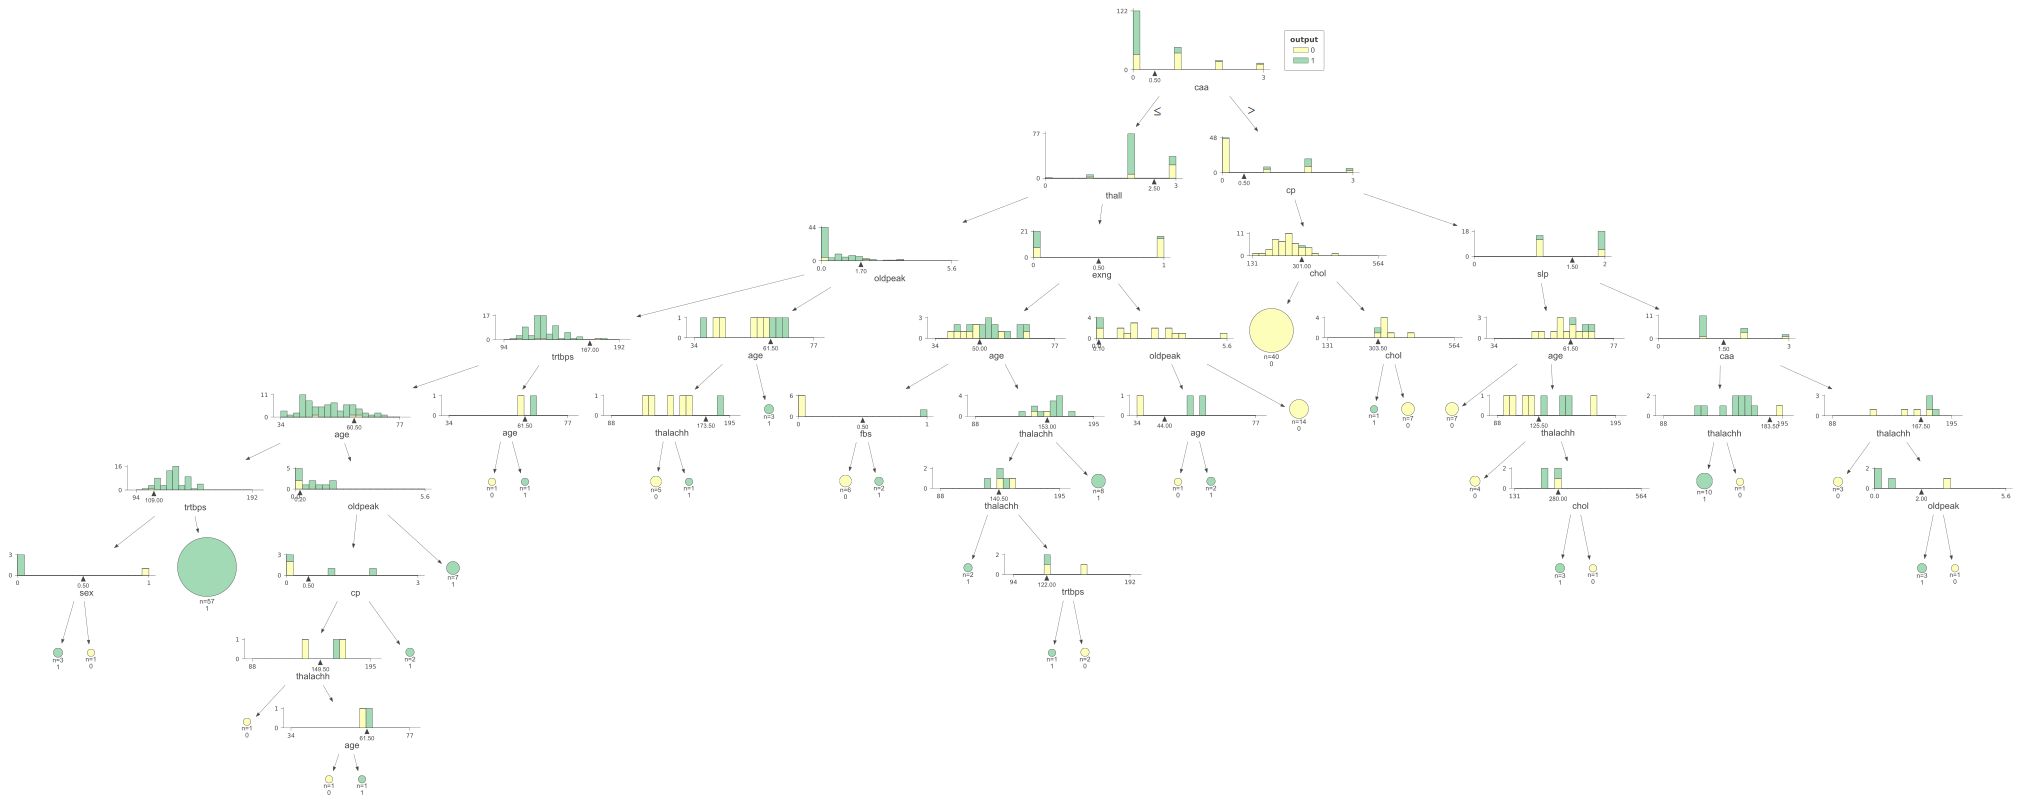

In [50]:
#Para rodar essa célula é preciso ter a biblioteca graphviz instalada, caso dê erro é provável que seja isso
feature_names=list(X_train.columns)

viz = dtreeviz(clf, X_train, Y_train,
                target_name="output",
                feature_names=feature_names,
                class_names=[0,1])
viz

### Análise

Uma árvore de decisão é um mapeamento dos resultados possíveis de uma série de escolhas relacionadas. Eles podem ser usados para discussões informais ou algoritmos de desenho para prever a melhor escolha matematicamente. As árvores de decisão geralmente começam em um único nó e se ramificam para os resultados possíveis. 

Cada um desses resultados leva a nós adicionais, que se expandem para outras possibilidades. Isso lhe dá uma forma de árvore. Existem três tipos diferentes de nós: nós de probabilidade, nós de decisão e nós finais. Os nós de probabilidade representados por círculos mostram a probabilidade de certos resultados. O nó de decisão representado pelo quadrado representa a decisão a ser tomada e o nó final representa o resultado final do caminho de decisão.
    
Utilizando a Árvore de Decisões, foi possível atingir uma acurácia de 75%. Novamente há uma tabela mostrando a relevância de cada feature neste modelo específico e uma matriz de confusão que mostra resultados promissores.

____

# **Conclusão**

Ao longo do projeto foi possível avaliar com a análise das features individualmente e como elas se relacionavam a variável target a fim de a predizer. Em seguida foram testados diversos modelos de predição a fim de encontrar o mais eficiente e após  três destes serem testados foi concluido que o SVC foi o mais eficaz e que garantiu um resultado com maior acurácia. 

Além desta análise, para haver uma  certeza maior, foram selecionadas as variáveis mais relevantes para o modelo e comparadas com os gráficos de cada feature, e estes coincidiram. Mostrando a precisão do modelo.